## prepare a prediction model for predicting Price.

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error,accuracy_score

In [2]:
toy_data = pd.read_csv('ToyotaCorolla.csv')

In [3]:
toy_data.head()

,Id,Model,Price,Age_08_04,Mfg_Month,Mfg_Year,KM,Fuel_Type,HP,Met_Color,...,Central_Lock,Powered_Windows,Power_Steering,Radio,Mistlamps,Sport_Model,Backseat_Divider,Metallic_Rim,Radio_cassette,Tow_Bar
0,1,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13500,23,10,2002,46986,Diesel,90,1,...,1,1,1,0,0,0,1,0,0,0
1,2,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13750,23,10,2002,72937,Diesel,90,1,...,1,0,1,0,0,0,1,0,0,0
2,3,�TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,13950,24,9,2002,41711,Diesel,90,1,...,0,0,1,0,0,0,1,0,0,0
3,4,TOYOTA Corolla 2.0 D4D HATCHB TERRA 2/3-Doors,14950,26,7,2002,48000,Diesel,90,0,...,0,0,1,0,0,0,1,0,0,0
4,5,TOYOTA Corolla 2.0 D4D HATCHB SOL 2/3-Doors,13750,30,3,2002,38500,Diesel,90,0,...,1,1,1,0,1,0,1,0,0,0


In [4]:
new_toy_data = toy_data[["Price","Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
new_toy_data

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,13500,23,46986,90,2000,3,5,210,1165
1,13750,23,72937,90,2000,3,5,210,1165
2,13950,24,41711,90,2000,3,5,210,1165
3,14950,26,48000,90,2000,3,5,210,1165
4,13750,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...,...
1431,7500,69,20544,86,1300,3,5,69,1025
1432,10845,72,19000,86,1300,3,5,69,1015
1433,8500,71,17016,86,1300,3,5,69,1015
1434,7250,70,16916,86,1300,3,5,69,1015


In [5]:
new_toy_data.describe()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
count,1436.000000,1436.000000,1436.000000,1436.000000,1436.00000,1436.000000,1436.000000,1436.000000,1436.00000
mean,10730.824513,55.947075,68533.259749,101.502089,1576.85585,4.033426,5.026462,87.122563,1072.45961
std,3626.964585,18.599988,37506.448872,14.981080,424.38677,0.952677,0.188510,41.128611,52.64112
min,4350.000000,1.000000,1.000000,69.000000,1300.00000,2.000000,3.000000,19.000000,1000.00000
25%,8450.000000,44.000000,43000.000000,90.000000,1400.00000,3.000000,5.000000,69.000000,1040.00000
50%,9900.000000,61.000000,63389.500000,110.000000,1600.00000,4.000000,5.000000,85.000000,1070.00000
75%,11950.000000,70.000000,87020.750000,110.000000,1600.00000,5.000000,5.000000,85.000000,1085.00000
max,32500.000000,80.000000,243000.000000,192.000000,16000.00000,5.000000,6.000000,283.000000,1615.00000


In [6]:
new_toy_data.shape

(1436, 9)

In [7]:
new_toy_data.isna().sum()

Price            0
Age_08_04        0
KM               0
HP               0
cc               0
Doors            0
Gears            0
Quarterly_Tax    0
Weight           0
dtype: int64

In [8]:
new_toy_data.corr()

,Price,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
Price,1.000000,-0.876590,-0.569960,0.314990,0.126389,0.185326,0.063104,0.219197,0.581198
Age_08_04,-0.876590,1.000000,0.505672,-0.156622,-0.098084,-0.148359,-0.005364,-0.198431,-0.470253
KM,-0.569960,0.505672,1.000000,-0.333538,0.102683,-0.036197,0.015023,0.278165,-0.028598
HP,0.314990,-0.156622,-0.333538,1.000000,0.035856,0.092424,0.209477,-0.298432,0.089614
cc,0.126389,-0.098084,0.102683,0.035856,1.000000,0.079903,0.014629,0.306996,0.335637
Doors,0.185326,-0.148359,-0.036197,0.092424,0.079903,1.000000,-0.160141,0.109363,0.302618
Gears,0.063104,-0.005364,0.015023,0.209477,0.014629,-0.160141,1.000000,-0.005452,0.020613
Quarterly_Tax,0.219197,-0.198431,0.278165,-0.298432,0.306996,0.109363,-0.005452,1.000000,0.626134
Weight,0.581198,-0.470253,-0.028598,0.089614,0.335637,0.302618,0.020613,0.626134,1.000000


<AxesSubplot:>

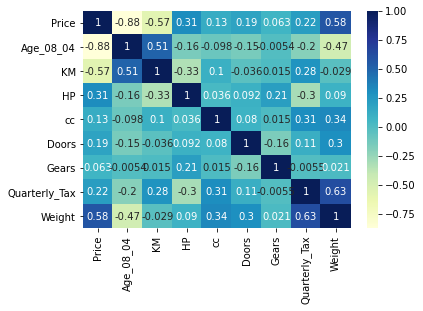

In [9]:
sns.heatmap(new_toy_data.corr(),annot = True,cmap = "YlGnBu" )

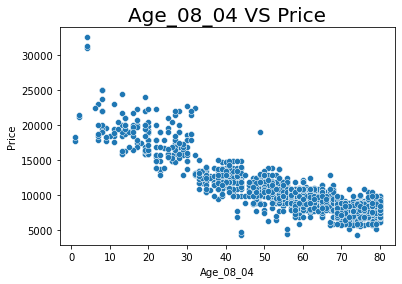

In [10]:
sns.scatterplot(x = 'Age_08_04' ,y ='Price', data = new_toy_data)
plt.title('Age_08_04 VS Price',size = 20)
plt.show()

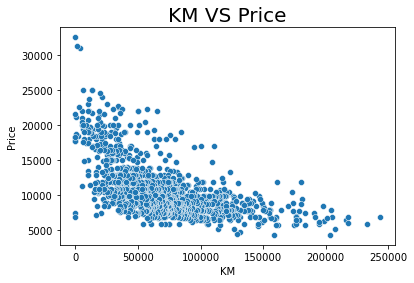

In [11]:
sns.scatterplot(x = 'KM' ,y ='Price', data = new_toy_data)
plt.title('KM VS Price',size = 20)
plt.show()

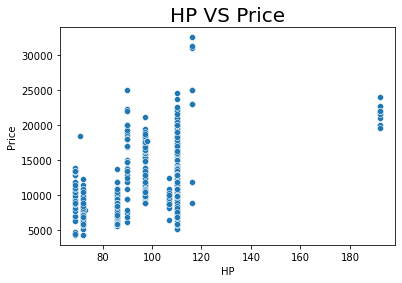

In [12]:
sns.scatterplot(x = 'HP' ,y ='Price', data = new_toy_data)
plt.title('HP VS Price',size = 20)
plt.show()

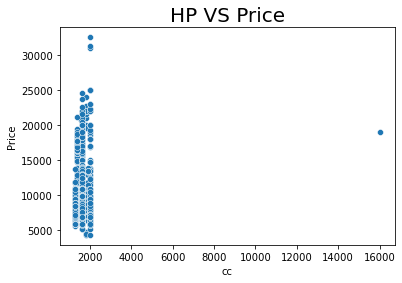

In [13]:
sns.scatterplot(x = 'cc' ,y ='Price', data = new_toy_data)
plt.title('HP VS Price',size = 20)
plt.show()

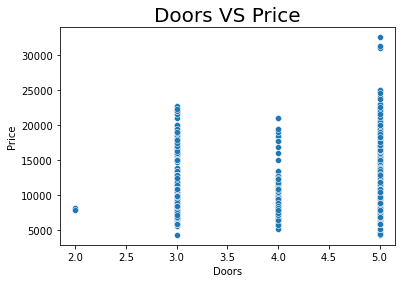

In [14]:
sns.scatterplot(x = 'Doors' ,y ='Price', data = new_toy_data)
plt.title('Doors VS Price',size = 20)
plt.show()

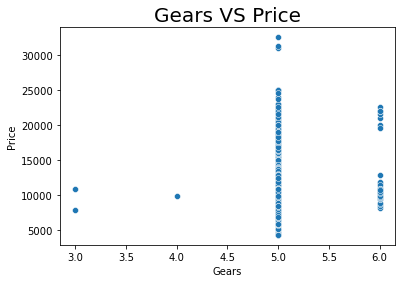

In [15]:
sns.scatterplot(x = 'Gears' ,y ='Price', data = new_toy_data)
plt.title('Gears VS Price',size = 20)
plt.show()

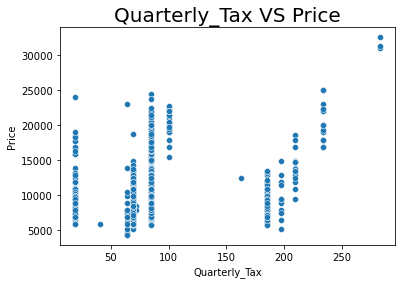

In [16]:
sns.scatterplot(x = 'Quarterly_Tax' ,y ='Price', data = new_toy_data)
plt.title('Quarterly_Tax VS Price',size = 20)
plt.show()

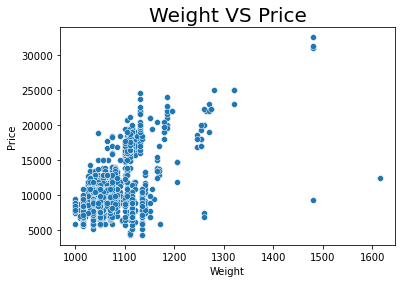

In [17]:
sns.scatterplot(x = 'Weight' ,y ='Price', data = new_toy_data)
plt.title('Weight VS Price',size = 20)
plt.show()

In [19]:
X = new_toy_data[["Age_08_04","KM","HP","cc","Doors","Gears","Quarterly_Tax","Weight"]]
y = new_toy_data['Price']

In [20]:
X

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
0,23,46986,90,2000,3,5,210,1165
1,23,72937,90,2000,3,5,210,1165
2,24,41711,90,2000,3,5,210,1165
3,26,48000,90,2000,3,5,210,1165
4,30,38500,90,2000,3,5,210,1170
...,...,...,...,...,...,...,...,...
1431,69,20544,86,1300,3,5,69,1025
1432,72,19000,86,1300,3,5,69,1015
1433,71,17016,86,1300,3,5,69,1015
1434,70,16916,86,1300,3,5,69,1015


In [21]:
y

0       13500
1       13750
2       13950
3       14950
4       13750
        ...  
1431     7500
1432    10845
1433     8500
1434     7250
1435     6950
Name: Price, Length: 1436, dtype: int64

In [22]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.40)

In [23]:
X_train

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
396,53,117913,69,1900,5,5,64,1110
801,61,73894,110,1600,3,6,85,1065
1245,77,80486,110,1600,5,5,85,1070
90,20,48110,97,1400,3,5,85,1100
85,28,8537,110,1600,5,5,85,1130
...,...,...,...,...,...,...,...,...
193,40,130062,69,1900,5,5,185,1140
51,30,57086,97,1400,5,5,85,1110
412,48,98100,69,1900,5,5,185,1140
875,68,62222,110,1600,5,5,85,1075


In [24]:
X_test

,Age_08_04,KM,HP,cc,Doors,Gears,Quarterly_Tax,Weight
627,65,132807,72,2000,5,5,185,1135
1228,77,84000,110,1600,5,5,85,1085
1058,77,172980,72,2000,5,5,64,1135
555,50,40400,97,1400,5,5,85,1060
379,51,198167,69,1900,4,5,185,1095
...,...,...,...,...,...,...,...,...
369,44,21027,110,1600,5,5,85,1080
746,66,81250,110,1600,3,5,19,1050
126,20,36000,110,1600,5,5,19,1075
601,50,1,90,2000,3,5,64,1260


In [25]:
y_train

396      9950
801      9995
1245     7990
90      16450
85      17450
        ...  
193     11750
51      15750
412      8950
875      9900
135     16500
Name: Price, Length: 861, dtype: int64

In [26]:
y_test

627      8950
1228     7750
1058    10500
555     11250
379      6400
        ...  
369     13250
746      8250
126     15950
601      7500
151     19950
Name: Price, Length: 575, dtype: int64

In [29]:
model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [32]:
y_pred = model.predict(X_test)
y_pred

array([ 8608.96708212,  8236.62505998,  5682.91143416, 11666.42890325,
        8118.08197491,  7783.97809303,  7975.74936359,  7728.40979603,
        8567.39823851,  8172.1200679 ,  9540.59371526, 18875.59406224,
       12987.81063839,  8765.17110338,  8259.28612193,  6295.69370853,
        9941.07922038, 17240.55157828,  7393.94207026,  7877.16604443,
       16508.78028709, 12071.96981164,  9213.49568743, 13376.99611643,
       13868.84975763,  7970.23177296, 11927.37611385, 11945.00636033,
       16230.26558476, 14668.47830608, 12438.76428543,  7999.70716311,
        6872.89303031,  9697.67732023,  8300.23329896,  9387.61698663,
        7240.25877475, 13316.95688004, 17033.7008626 , 10908.49219106,
       12826.16827661,  8184.14471366, 11125.00783526,  7596.1482637 ,
        9149.7922235 , 14634.78222452, 11988.14483825,  7433.17231325,
       11594.81885613, 10836.75580119, 10193.72034099, 14523.39097456,
        8400.74850533,  7796.8158565 ,  9921.25680995,  6188.22730854,
      

In [33]:
y_pred.shape

(575,)

In [34]:
print("MSE      :",round(mean_absolute_error(y_test,y_pred),4))
print("R2 Score :",round(r2_score(y_test,y_pred),4))

MSE      : 1020.3593
R2 Score : 0.8568
